In [1]:
from 文件处理 import unzip_data


unzip_data('dataSet/Zebra.zip', 'dataSet/Zebra')

In [6]:
!ls dataSet / Zebra

others         zebra crossing


In [1]:
from 文件处理 import get_size_type
sizeDict, typeDict = get_size_type("dataSet")
for typeName in typeDict.keys():
    print(typeName, "类型共", typeDict[typeName], "个文件,这些文件共占空间", sizeDict[typeName] / 1024.0/1024.0, "MB")

None 类型共 1 个文件,这些文件共占空间 0.005863189697265625 MB
.png 类型共 443 个文件,这些文件共占空间 2.502687454223633 MB
.txt 类型共 2 个文件,这些文件共占空间 0.015848159790039062 MB
.jpeg 类型共 2183 个文件,这些文件共占空间 1216.0081672668457 MB
.xml 类型共 1938 个文件,这些文件共占空间 3.2513771057128906 MB


### 图像直方图的绘制

[92 53 52 ... 25 20 21]


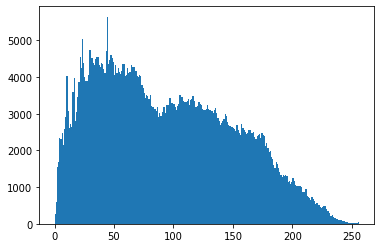

In [21]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("dataSet/nezha.png") # 读取图像
# 统计所有通道的直方图
img = img.reshape([-1])
print(img)
plt.hist(img,256,[0,256])
plt.show()

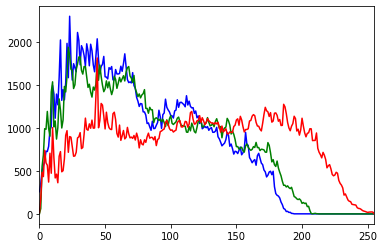

In [17]:
# 分别展示不同的通道下的直方图
import cv2

img = cv2.imread("dataSet/nezha.png", 1)  # 读取图像
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 255])
    plt.plot(hist, color=color)
    plt.xlim([0, 255])
plt.show()

(369, 589)
217341


/var/folders/y0/h43c8qwj60zb3ht135jgyf8r0000gn/T/ipykernel_6722/1452772691.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x_range,xy,"r",linewidth=2,c='black')


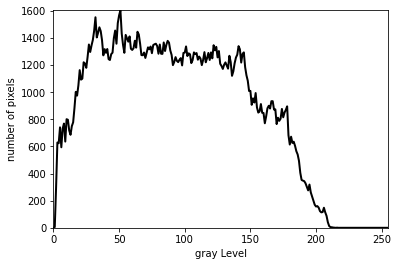

In [2]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

def main():
    img=cv2.imread('dataSet/nezha.png',0)
    #得到计算灰度直方图的值
    n = np.array(img)
    xy=xygray(img)

    #画出灰度直方图
    x_range=range(256)
    plt.plot(x_range,xy,"r",linewidth=2,c='black')
    #设置坐标轴的范围
    y_maxValue=np.max(xy)
    plt.axis([0,255,0,y_maxValue])
    #设置坐标轴的标签
    plt.xlabel('gray Level')
    plt.ylabel("number of pixels")
    plt.show()

def xygray(img):
    #得到高和宽
    rows,cols=img.shape
    print(img.shape)
    #存储灰度直方图
    xy=np.zeros([256],np.uint64)
    for r in range(rows):
        for c in range(cols):
            xy[img[r][c]] += 1
    #返回一维ndarry
    print(xy.sum())
    return xy

main()

### 文本处理
词频处理

In [8]:
from 词频处理 import read, readStopWord
import jieba

# 读取文件
context = read("./dataSet/词/zuowen.txt")
stopword = readStopWord("./dataSet/词/stop.txt")

words = list(jieba.lcut(context))
# print(contextList)


#创建一个字典,存放每个词,并确定每个词出现的次数
wordDict = {}
for word in words:
    if len(word) == 1:
        continue
    if word not in stopword:
        wordDict.setdefault(word, 0)
        wordDict[word] += 1

# 将字典进行排序
wordList = list(wordDict.items())
wordList.sort(key = lambda x:x[1],reverse=True)
wordList[:10]

[('保尔', 8),
 ('人生', 5),
 ('英雄', 5),
 ('生活', 4),
 ('面对', 4),
 ('钢铁', 3),
 ('炼成', 3),
 ('精神', 3),
 ('困难', 3),
 ('社会', 3)]